# Gene Set Enrichment Analysis (GSEA)

Gene Set Enrichment Analysis (GSEA) identifies gene sets that are upnregulated or downregulated between two conditions/phenotypes. The GSEA method can be summarized as:

1. Take gene expression data from two different types of samples (e.g., treated vs non-treated) and rank all genes according to their degree of differential expression between the phenotypes.
2. Take a set of genes of interest (e.g., pathway, locus, etc.) and determine whether they are differentially expressed as a group (enriched) within the ranked gene expression data.  
*Note: you can repeat this step for multiple gene sets*
3. Determine the significance of the enrichment analysis score via a permutation test: randomly swap the gene-set labels of the data and repeat the test many times.

For more detailed information, visit <a href="http://software.broadinstitute.org/gsea/">the GSEA website</a>.

## Sign in to GenePattern

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>
If you haven&#39;t yet logged in, enter your credentials into the cell below and click Login.</li>
</div>


In [4]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Data preprocessing

It is necessary to normalize RNA-seq data as a preprocessing step. More details about RNA-seq data normalization and the method used in this notebook (DESeq2) can be found in <a href="https://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Main_Page#Getting_started_with_RNA-seq_and_GSEA">the GSEA wiki website</a>.

If you are working with microarray data, feel free to skip this step and go to [Run GSEA](#Run-GSEA).

## DESeq2 normalization (for RNA-seq data)

We recommend using DESeq2 to preprocess RNA-seq count data to make it suitable for use in GSEA analysis. The <a href="https://htmlpreview.github.io/?https://github.com/genepattern/DESeq2/blob/master/docs/v1/index.html">DESeq2</a> module perfoms the normalization explained in [Love, Huber, and Anders (2014)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4302049/#Sec2title).

<div class="well">
    
**Note:** DESeq2 is intended to work with raw read counts such as those produced by HTSeq or RSEM.  These counts should not be normalized a priori and also should not be RPKM or FPKM values.

<!--
<div class="well">
**Note:** -->You may follow these steps with your own RNA-Seq data or with the sample data provided (BRCA, cancer vs normal samples from TCGA).
<!--
but you can follow these steps with your own RNA-Seq raw counts. 
-->

<div class="alert alert-info">

<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ul>
	<li>For the <b>input file*</b> parameter, click the "Upload File..." button to provide your RNA-Seq data in the form of a GCT file (<a href="http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT">read about GCT files here</a>).<br>Alternatively drag and drop <a href="https://datasets.genepattern.org/data/module_support_files/DESeq2/BRCA_tumor_and_normal_20783x40.gct">this sample BRCA dataset</a>.</li>
    <li>For the <b>cls file*</b> parameter, click the "Upload File..." button to provide the CLS file with the phenotypic information (<a href="http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS">read about CLS files here</a>).<br>Alternatively, drag and drop <a href="https://datasets.genepattern.org/data/module_support_files/DESeq2/BRCA_tumor_and_normal_x40.cls" target="_blank">this sample CLS file</a>.</li>
    <li>Feel free to leave the rest of parameters as default.</li>
</ul>
</div>

<div class="well well-sm">
<b>Note:</b> This module will table around 10 minutes to run.
</div>

In [5]:
deseq2_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')
deseq2_job_spec = deseq2_task.make_job_spec()
deseq2_job_spec.set_parameter("input.file", "")
deseq2_job_spec.set_parameter("cls.file", "")
deseq2_job_spec.set_parameter("confounding.variable.cls.file", "")
deseq2_job_spec.set_parameter("output.file.base", "<input.file_basename>")
deseq2_job_spec.set_parameter("qc.plot.format", "skip")
deseq2_job_spec.set_parameter("fdr.threshold", "0.1")
deseq2_job_spec.set_parameter("top.N.count", "20")
deseq2_job_spec.set_parameter("random.seed", "779948241")
deseq2_job_spec.set_parameter("job.memory", "2 Gb")
deseq2_job_spec.set_parameter("job.queue", "gp-cloud-default")
deseq2_job_spec.set_parameter("job.cpuCount", "1")
deseq2_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(deseq2_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')

# Run GSEA

## GSEA parameters

<div class="alert alert-info">
<h3 id="-Instructions" style="margin-top: 0;" data-toc-modified-id="-Instructions-3.1.1"><a id="-Instructions-3.1.1" class="toc-mod-link"></a> Instructions</h3>
Follow these instructions if you plan on replicating the exercise on the sample data, or use your own corresponding files.
<ol>
<li>For the <strong><em>expression dataset</em></strong> parameter, from the drop down menu choose the file which ends in ".normalized_counts.gct" from the outputs the <strong>DESeq2</strong> module above (it is the only GCT file, so it is easy to find).<br />If you are using the sample data, the file you will choose should be called <i>BRCA_tumor_and_normal_20783x40.matched_normal.vs.primary_tumor.normalized_counts.gct</i>.</li>
<li>For the <strong><em>gene sets database</em></strong> parameter, select a suitable gene set collection. This file contains a list of curated gene sets from online pathway databases, publications in PubMed, and knowledge of domain experts. Fore more information on gene sets visit <a href="http://software.broadinstitute.org/gsea/msigdb" target="_blank" rel="noopener">the MSigDB website</a>. <br />If you are using the sample data, you can scroll to the bottom of the scroll down menu and choose <em>h.all.v7.0.symbols.gmt [Hallmarks]&nbsp;</em></li>
<li>For the <strong><em>phenotype labels</em></strong> parameter, select the same CLS file as in the previous step.<br />If you are using the sample data, right click <a href="https://datasets.genepattern.org/data/module_support_files/DESeq2/BRCA_tumor_and_normal_x40.cls" target="_blank" rel="noopener"> this link to the sample CLS file</a>, select "Copy Link Address," and paste it into the <em>"Add File or URL..." </em>text box.</li>
<li>For the <strong><em>permutation type</em></strong> parameter, leave it as <strong>phenotype</strong> if you have more than a handful of samples, otherwise select <strong>gene_set</strong>.</li><br />If you are using the sample data, right leave as is, since this dataset contains 20 samples of each phenotype.
<li>Generally you will set the <strong><em>collapse dataset</em></strong> parameter to <strong>Collapse</strong>.
<ul type="1">
<li>Note that if you select Remap_Only or Collapse, for the parameter <strong>chip platform file</strong> you will need to select the correct Chip file, if your data is annotated using HUGO or HGNC symbols (e.g., BRCA1) you can select <em>Human_Symbol_with_Remapping_MSigDB.v7.0.chip</em> from the dropdown menu.</li>
</ul>
</li>
<li>Click the button <strong><em>Run</em></strong> on the analysis below.</li>
<li>You can view the analysis results in the panel that opens automatically below the analysis cell once the job is complete. </li>
</ol>
</div>

In [6]:
gsea_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')
gsea_job_spec = gsea_task.make_job_spec()
gsea_job_spec.set_parameter("expression.dataset", "")
gsea_job_spec.set_parameter("gene.sets.database", "")
gsea_job_spec.set_parameter("number.of.permutations", "1000")
gsea_job_spec.set_parameter("phenotype.labels", "")
gsea_job_spec.set_parameter("target.profile", "")
gsea_job_spec.set_parameter("collapse.dataset", "Collapse")
gsea_job_spec.set_parameter("permutation.type", "phenotype")
gsea_job_spec.set_parameter("chip.platform.file", "")
gsea_job_spec.set_parameter("scoring.scheme", "weighted")
gsea_job_spec.set_parameter("metric.for.ranking.genes", "Signal2Noise")
gsea_job_spec.set_parameter("gene.list.sorting.mode", "real")
gsea_job_spec.set_parameter("gene.list.ordering.mode", "descending")
gsea_job_spec.set_parameter("max.gene.set.size", "500")
gsea_job_spec.set_parameter("min.gene.set.size", "15")
gsea_job_spec.set_parameter("collapsing.mode.for.probe.sets.with.more.than.one.match", "Max_probe")
gsea_job_spec.set_parameter("normalization.mode", "meandiv")
gsea_job_spec.set_parameter("randomization.mode", "no_balance")
gsea_job_spec.set_parameter("omit.features.with.no.symbol.match", "true")
gsea_job_spec.set_parameter("make.detailed.gene.set.report", "true")
gsea_job_spec.set_parameter("median.for.class.metrics", "false")
gsea_job_spec.set_parameter("number.of.markers", "100")
gsea_job_spec.set_parameter("plot.graphs.for.the.top.sets.of.each.phenotype", "20")
gsea_job_spec.set_parameter("random.seed", "timestamp")
gsea_job_spec.set_parameter("save.random.ranked.lists", "false")
gsea_job_spec.set_parameter("create.svgs", "false")
gsea_job_spec.set_parameter("selected.gene.sets", "")
gsea_job_spec.set_parameter("output.file.name", "<expression.dataset_basename>.zip")
gsea_job_spec.set_parameter("alt.delim", "")
gsea_job_spec.set_parameter("create.zip", "true")
gsea_job_spec.set_parameter("create.gcts", "false")
gsea_job_spec.set_parameter("dev.mode", "false")
gsea_job_spec.set_parameter("job.memory", "8 Gb")
gsea_job_spec.set_parameter("job.queue", "gp-cloud-default")
gsea_job_spec.set_parameter("job.cpuCount", "1")
gsea_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(gsea_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')

### Ressults interpretation

<em>For information on how to interpret the results, you can visit <a href="http://software.broadinstitute.org/gsea/doc/GSEAUserGuideTEXT.htm#_Interpreting_GSEA_Results" target="_blank" rel="noopener">the GSEA website</a></em>

GSEA produces many outputs. By default you will see the contents of <i>index.html</i>, which lists, among other information, which gene sets were enriched in eahc phenotype. To quickly look at the results, for click on <i>Snapshot</i> for a given phenotype and you will see the mountain plots of each gene set significantly enriched in that phenotype. Here is a figure showing the most important elements on a mountain plot:

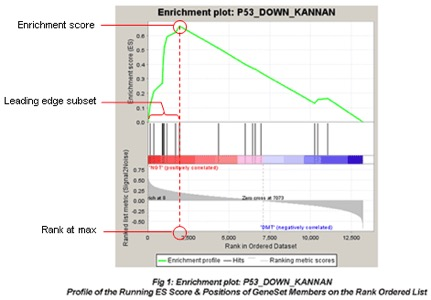

Note that you can use your browser's back button to go back to the index.

# References

- Subramanian, A., Tamayo, P., Mootha, V.K., Mukherjee, S., Ebert, B.L., Gillette, M.A., Paulovich, A., Pomeroy, S.L., Golub, T.R., Lander, E.S. and Mesirov, J.P. 2005. Gene set enrichment analysis: a knowledge-based approach for interpreting genome-wide expression profiles. Proceedings of the National Academy of Sciences of the United States of America 102(43), pp. 15545–15550. <a href='https://doi.org/10.1073/pnas.0506580102'>DOI:10.1073/pnas.0506580102</a>.
- Law CW, Chen Y, Shi W and Smyth GK (2014). "voom: precision weights unlock linear model analysis tools for RNA-seq read counts." Genome Biology, 15:R29 <a href='https://doi.org/10.1186/gb-2014-15-2-r29'>DOI:10.1186/gb-2014-15-2-r29</a>.
- Smythe GK, et al. (2015). "Package 'limma'" documentation from Bioconductor 3.0. <a href="https://bioconductor.org/packages/3.0/bioc/manuals/limma/man/limma.pdf">https://bioconductor.org/packages/3.0/bioc/manuals/limma/man/limma.pdf</a>.
- Michael I Love, Wolfgang Huber, and Simon Anders. “Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2.” Genome biology vol. 15,12 (2014): 550. [DOI:10.1186/s13059-014-0550-8](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8)